<IPython.core.display.Javascript object>


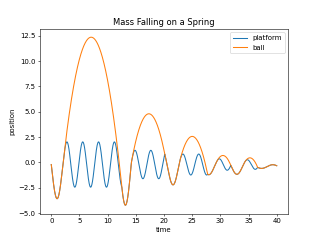

In [45]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
#force for general spring
k=1
m=.2
M=.2
g=1
def position(l,k,x,v,t1):
    p = -l*g/k
    a = v*np.sqrt(((x-p)/v)**2*k/l+1)*np.sqrt(l/k)
    b = a*np.sin(np.sqrt(k/l)*t1+np.arctan((x-p)/v*np.sqrt(k/l)))+p
    return b
def velocity(l,k,x,v,t1):
    p = -l*g/k
    a = np.sqrt(((x-p)/v)**2*k/l+1)*v
    b = a*np.cos(np.sqrt(k/l)*t+np.arctan((x-p)/v*np.sqrt(k/l)))
    return b
#def force(x,M,m,k,g):
    #return -k*x-m*g-M*g
ts = [] #time array
xfly_list = [] #moving block
xspring_list = [] #stationary block 
vfly_list = [] #moving block
vspring_list = [] #moving block 
xspring_old = -M*g/k
xfly_old = xspring_old
vspring_old = -5
vfly_old = -20
xspring = 0 #placeholder
xfly = 0 #placeholder
vspring = vspring_old #placeholder
vfly = 0 #placeholder
aspring = 0 
afly = 0
p_release = -(M-m)*g/k
time_hold=0
io = 0
dt = 0.001
free_fall = 0
low_bound = -g*(3*M+m)/k
high_bound = -g*(M-m)/k
t_free = 0 #time count for free fall 
tmax = 40
ia=0
ib=0
c=0
xspring = xspring_old
#amplitude function
def amp(M,m,k,g,x,v):
    a = 0.5*k
    b = (M+m)*g
    c = -(0.5*k*x**2+0.5*(m+M)*v**2+(m+M)*g*x)
    if (v>0):
        return (-b+np.sqrt(b**2-4*a*c))/(2*a)
    if (v<0):
        return (-b-np.sqrt(b**2-4*a*c))/(2*a)

#while (not low_bound<amp(M,m,k,g, xspring_old, vspring_old)<high_bound):
while True:
    while (p_release>xspring or vspring<0):
        t = io*dt
        if (t>tmax):
            break
        t_lock = ib*dt
        xspring = position((M+m),k,xspring_old,vspring_old,t_lock)
        vspring = velocity((M+m),k,xspring_old,vspring_old,t_lock)
        xfly = xspring
        vfly = vspring
        #update arrays
        ts.append(t)
        xspring_list.append(xspring)
        xfly_list.append(xfly)
        vspring_list.append(vspring)
        vfly_list.append(vfly)
        #update olds
        xfly_old = xfly
        vfly_old = vfly
        time_hold = dt*io
        io+=1
        ib+=1
        c=0
    if (t>tmax):
            break
    ib=0
    xspring_old = xspring
    vspring_old = vspring
    free_fall = vfly
    free_place = xfly
    while(xspring<xfly+0.001):
        t = io*dt
        if (t>tmax):
            break
        t_free = ia*dt
        xspring = position((M),k,xspring_old,vspring_old,t_free)
        vspring = velocity((M),k,xspring_old,vspring_old,t_free)
        xfly = free_place+free_fall*t_free-0.5*g*t_free**2
        io+=1
        ia+=1
        xspring_list.append(xspring)
        vspring_list.append(vspring)
        xfly_list.append(xfly)
        vfly_list.append(vfly)
        ts.append(t)
    if (t>tmax):
        break
    
    xspring = xfly
    vfly = free_fall-g*t_free
    xspring_old = xspring
    
    vspring_old = (vspring*M+vfly*m)/(m+M) #inelastic collision 
    c=1
    ia=0

    

fig, ax = plt.subplots()
ax.plot(ts,xspring_list, label = "platform")
ax.set(xlabel='time', ylabel='position', title='Platform ')
ax.grid()
plt.legend()

ax.plot(ts,xfly_list, label = "ball")
ax.set(xlabel='time', ylabel='position', title='Mass Falling on a Spring')
ax.grid()
plt.legend()
plt.show()


## UNCOMMENT TO ANIMATE:

# fig = plt.figure()
# ax = plt.axes(xlim=(-1, 1), ylim=(-5, 16))
# line, = ax.plot([], [], lw=3)
# lines = []
# Nbody=2
# for index in range(Nbody):
#     lobj = ax.plot([],[],lw=3,)[0]
#     lines.append(lobj)

# def init():
#     for line in lines:
#         line.set_data([],[])
#     return lines


# def animate(i):
#     line_x1 = [0]*300
#     line_y1 = xspring_list[i-300:i]
#     line_x2 = [0]*100
#     line_y2 = xfly_list[i-100:i]
#     lines[0].set_data(line_x1,line_y1)
#     lines[1].set_data(line_x2,line_y2)
#     return lines

# anim = FuncAnimation(fig, animate, init_func=init,frames=40000, interval=1, blit=False)
